<a href="https://colab.research.google.com/github/jackysuenpython/Predict-Sales-Based-on-Budget-spend-on-marketing-and-advertising/blob/main/Predict_Sales_Based_on_Budget_spend_on_marketing_and_advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Science Project - Predict Sales Based on Budget spend on marketing and advertising
#Client has approached me to analysis their past advertisement budget spent data in order to predict the future sales so they know which channel platform should invest more budget etc
#The target variable is sales in thousand of dollars
#The features are TV, Radio and newspaper marketing spend in thousand of dollars
#Source:www.kaggle.com/ashydv/advertising-dataset

In [ ]:
#How do i approaach this clinet problem and quesion?
#Solution: Build a Machine Learning Linear Regression Model to predict the future value
#Mutiple Linear Regression Model examines relationship between more than two variables

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Mount my google drive cloud for data import (cloud)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# import dataset, include the full link to the csv file containing the dataset
ad_df = pd.read_csv('/content/drive/My Drive/Advertising.csv')

In [12]:
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


from matplotlib import pyplot as plt
ad_df['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ad_df['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ad_df['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ad_df['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ad_df.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ad_df.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ad_df.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ad_df['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ad_df['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ad_df['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ad_df['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
#Check Data Info and Type
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
#check data describe- count, mean etc
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

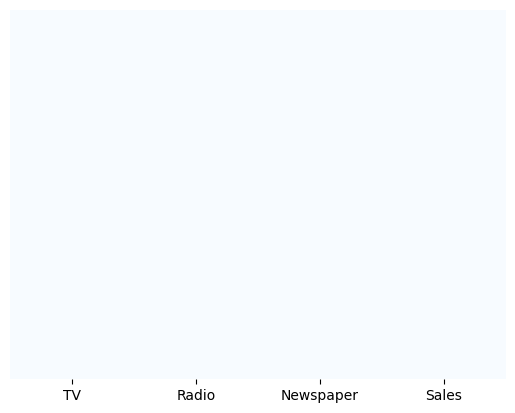

In [16]:
#VISUALIZE DATASET
#Data Cleaning
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(ad_df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')
#There is none

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

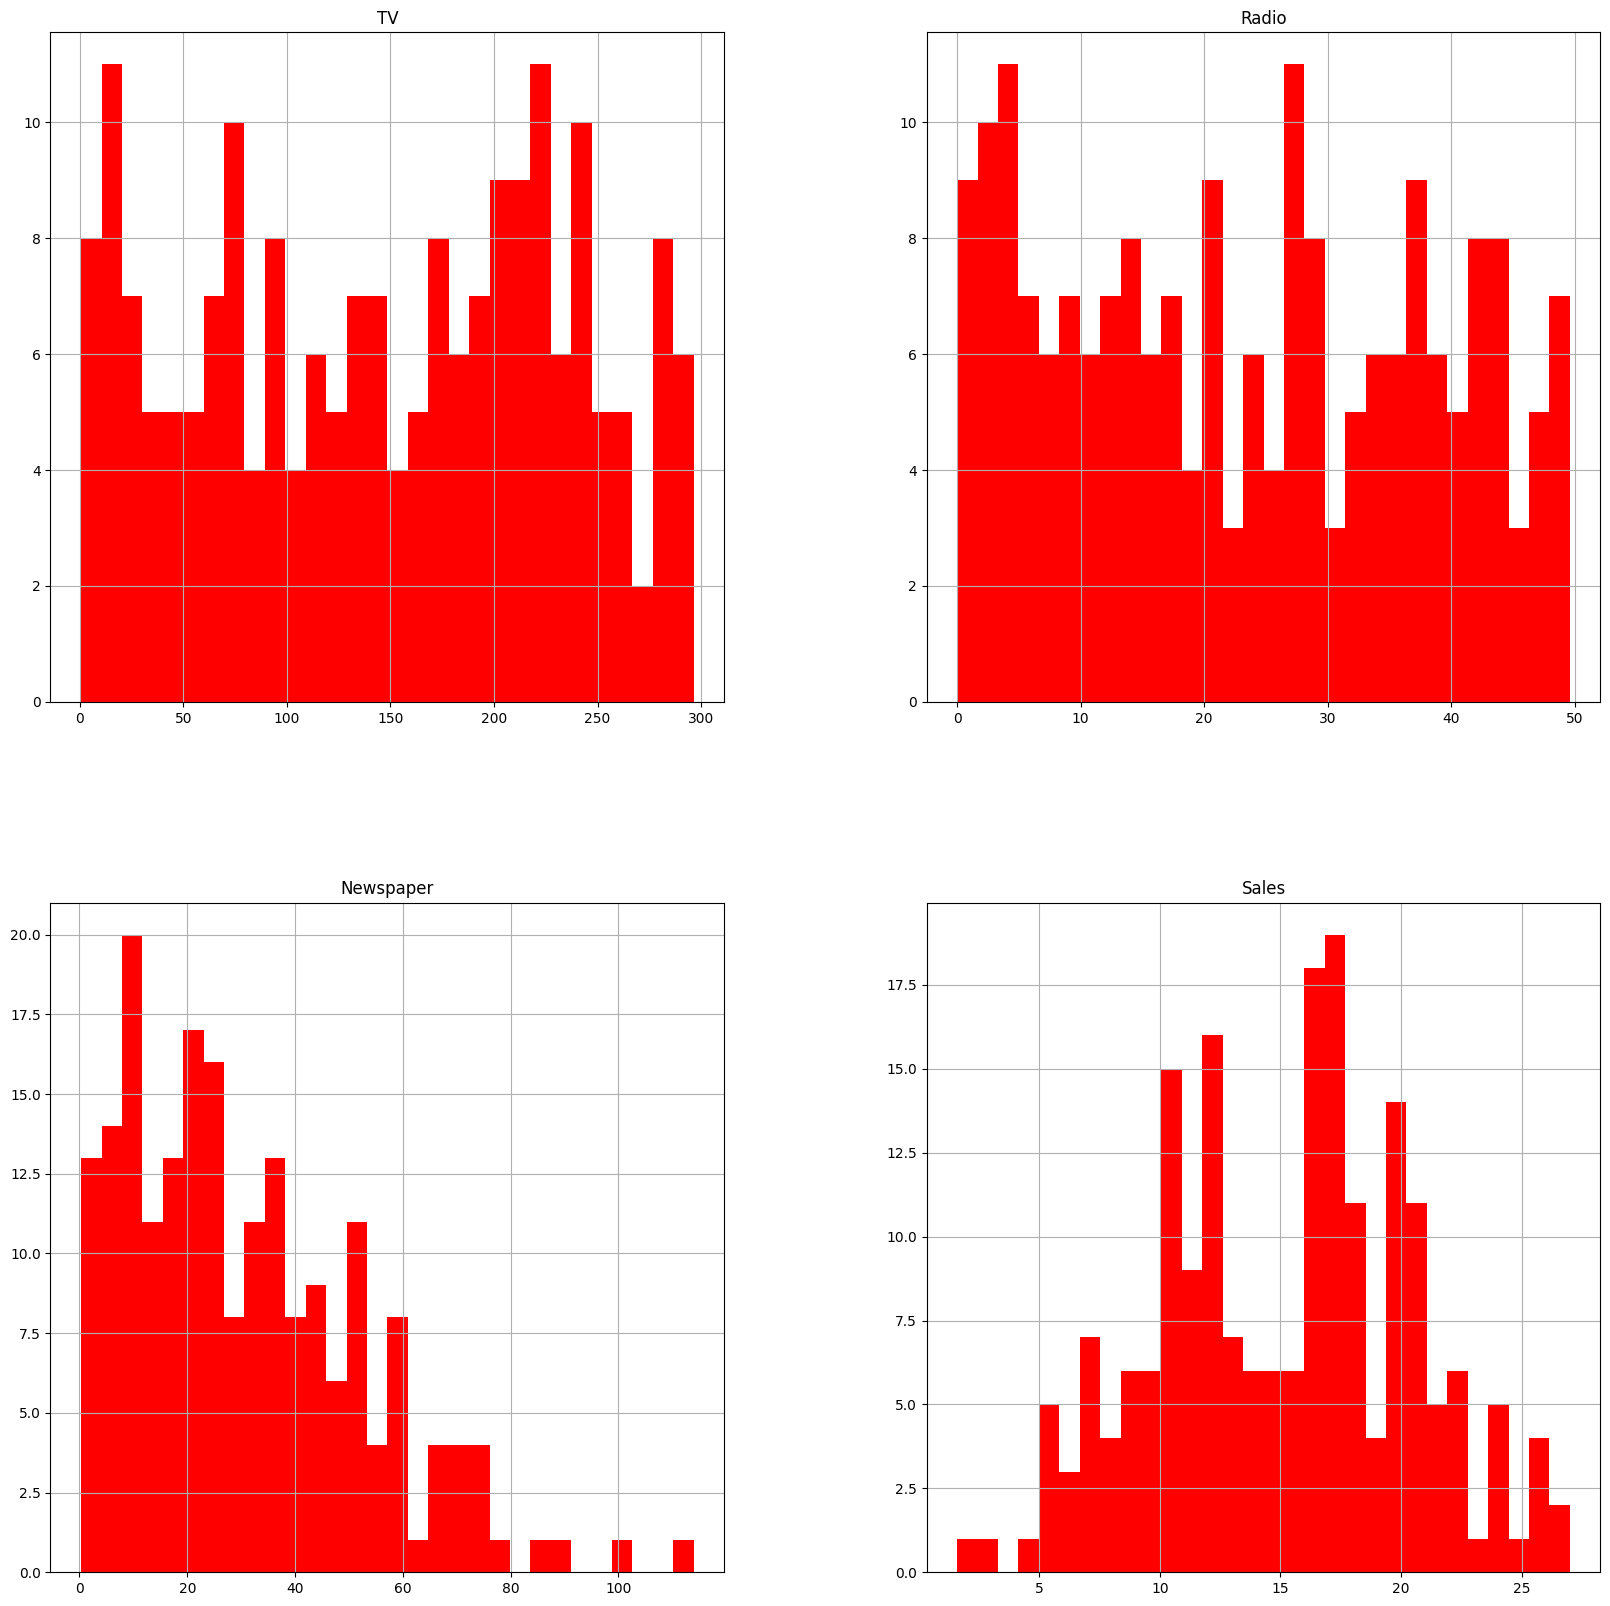

In [17]:
#Hist-gram to visualize the dataset
ad_df.hist(bins = 30, figsize = (20, 20), color = 'r')

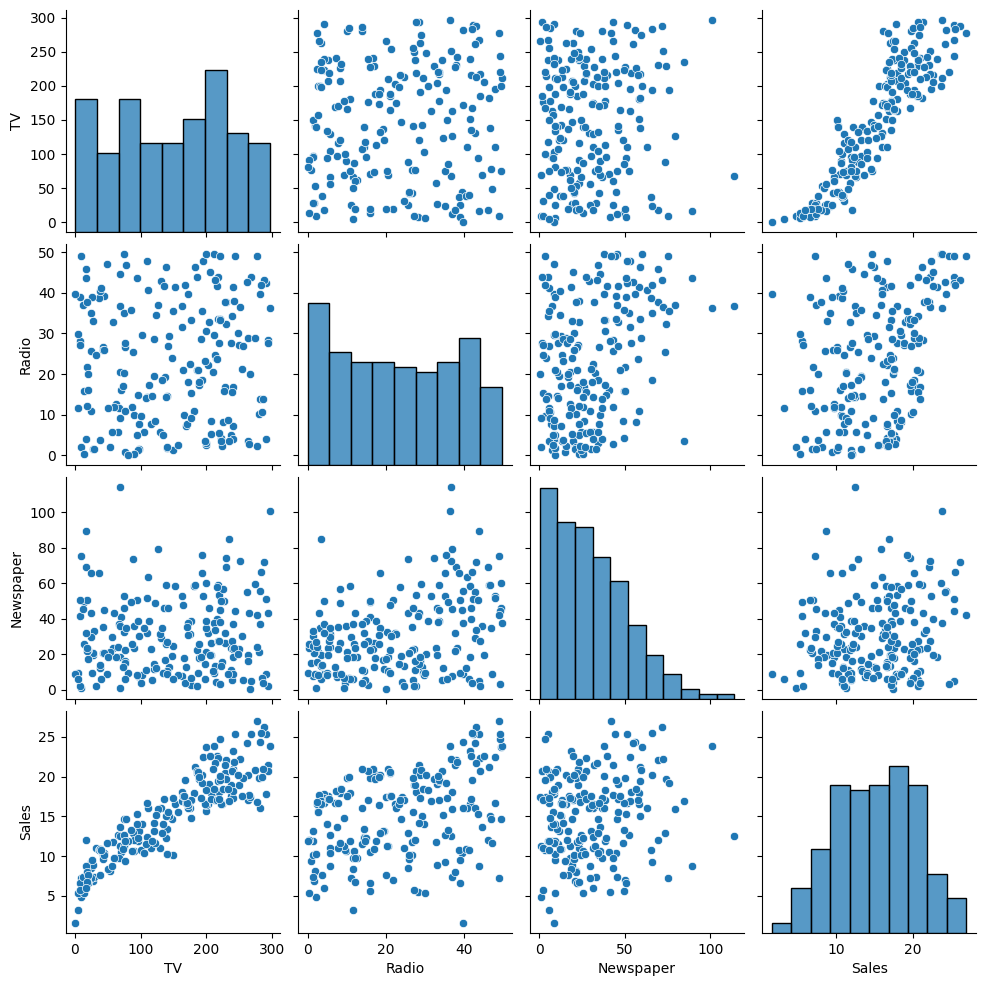

In [18]:
sns.pairplot(ad_df)
#See the correlaton between TV, Radio, Newspaper, Sales

<Axes: >

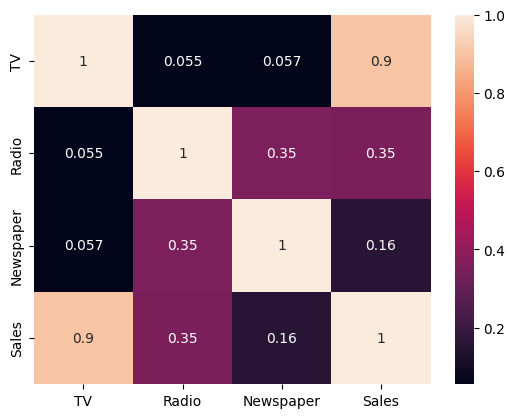

In [19]:
correlations = ad_df.corr()
sns.heatmap(correlations, annot = True)

In [ ]:
#CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [20]:
ad_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
#I need to separate the dependent and independent variables for testing and trainging the machine learning regression model
#TV Radio Newspaper are independent variables here
#Sale is the dependent variable because the value will change depends on how much were spent on Tv, Radio and Newspaper
X = ad_df[['TV', 'Radio', 'Newspaper']]
X


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
X.shape

(200, 3)

In [29]:
y = ad_df[['Sales']]
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [30]:
y.shape

(200, 1)

In [32]:
#20/80 training method, thats why i m using 0.2 as test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
#check the separated test size : 200 in total, 160-80%, 40-20%
X_train.shape

(160, 3)

In [34]:
X_test.shape

(40, 3)

In [35]:
#TRAIN THE MODEL
from sklearn.linear_model import LinearRegression

In [36]:
regressor = LinearRegression(fit_intercept = True)

In [38]:
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff(b):', regressor.intercept_)

Linear Model Coeff (m): [[0.05482403 0.10166972 0.00263294]]
Linear Model Coeff(b): [4.69991486]


In [40]:
#EVALUATE THE MODEL
y_predict = regressor.predict(X_test)
y_predict

array([[11.18975579],
       [ 9.30094347],
       [ 9.44467339],
       [ 6.11906988],
       [19.5624779 ],
       [18.14262821],
       [13.83796973],
       [16.47260336],
       [17.93943621],
       [ 7.20670545],
       [15.97391644],
       [13.06791384],
       [ 9.74684449],
       [17.02986751],
       [21.38093765],
       [24.69243957],
       [ 7.26708082],
       [12.43825078],
       [17.0047251 ],
       [23.74887041],
       [20.16596611],
       [12.14877249],
       [19.35554909],
       [19.52033977],
       [17.27294861],
       [12.31587263],
       [19.46706608],
       [13.8820626 ],
       [ 9.2119774 ],
       [10.91184979],
       [18.12417058],
       [14.84181182],
       [11.25394976],
       [20.5757518 ],
       [16.61728666],
       [17.13296739],
       [ 7.8627872 ],
       [11.58112001],
       [21.59964903],
       [10.30479222]])

In [41]:
y_test

,Sales
51,10.7
129,9.7
24,9.7
155,3.2
53,21.2
187,17.3
67,13.4
99,17.2
152,16.6
195,7.6


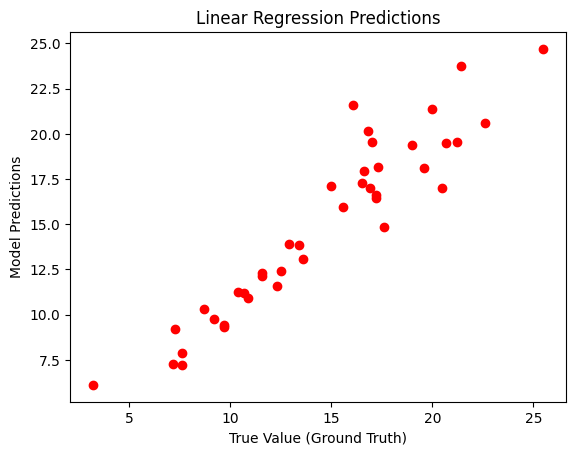

In [42]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Value (Ground Truth)')
plt.title('Linear Regression Predictions')
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MAPE = np.mean( np.abs( (y_test - y_predict) / y_test ) ) * 100

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [44]:
#Check the result to see how accurate my linear regression model is compared to the actual value. (Prediction vs Actual Value)
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nMean Absolute Percentage Error =', MAPE, '%')

RMSE = 1.689 
MSE = 2.854362463762313 
MAE = 1.236690914886993 
Mean Absolute Percentage Error = Sales    10.005668
dtype: float64 %


In [ ]:
#Summary
#RMSE: An RMSE of 1.689 is not very high, but it is also not exceptionally low. It is difficult to say definitively whether this is good or bad without knowing more about the scale of the target variable in your dataset.
#MSE: The MSE is 2.854, which is slightly higher than the square of the RMSE (1.689^2 = 2.846). This suggests that there may be some outliers in your data that are contributing to the MSE.
#MAE: The MAE is 1.237, which is slightly lower than the RMSE. This suggests that the errors are more evenly distributed than they would be if they were all large outliers.
#MAPE: The MAPE is 10.005%, which is not very high, especially if the target variable in your dataset is measured in percentages. However, it is important to note that the MAPE can be misleading if there are many zero or near-zero values in the target variable
#Overall, the results is making reasonably good predictions, but there is still room for improvement.

In [45]:
#Explaination

In [46]:
#Conclusion:

#The x-axis represents the advertising budget spent.
#The y-axis represents the sales.
#The blue dots represent individual data points (past advertising budget spent and corresponding sales).
#The red line is the fitted linear regression line, which represents the predicted sales for a given advertising budget spent.
#Interpretation:

#There is a positive correlation between advertising budget spent and sales. This means that, in general, as advertising budget increases, sales also tend to increase.
#The fitted regression line does not perfectly fit all the data points. This is because there are likely other factors besides advertising budget that influence sales.
#The R-squared value, which is not shown in the image but you mentioned earlier, is 0.717. This indicates that the model explains 71.7% of the variance in sales. While not perfect, it suggests a moderately strong relationship between advertising budget and sales.
#Additional notes:

#It's important to consider the outliers, which are data points that fall far away from the fitted line. These outliers could be due to measurement errors, one-time events, or other factors that the model does not account for.
#The model assumes a linear relationship between advertising budget and sales. However, it's possible that the true relationship is not perfectly linear.
#Overall:

#The linear regression model provides a reasonable starting point for understanding the relationship between advertising budget and sales. However, it's important to remember that the model is just an approximation and may not perfectly capture all the complexities of reality. You should consider factors like outliers and non-linear relationships when interpreting the results.